## Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data Files

In [3]:
# Creating Path
path = r'C:\Users\User\Desktop\2020 Instacart Basket Analysis'

In [5]:
# Importing ords_prods_cust_combine.pkl File
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'ords_prods_cust_combine.pkl'))

## Consider Any Security Implications that might Exist for This New Data

Although individual columns may not directly identify a person, the combination of certain columns—such as name, surname, age, gender, state, number of dependents, marital status, and income—could be used to identify an individual when cross-referenced with external data sources.
To mitigate this risk, sensitive columns like 'first_name' and 'last_name' should be removed from the dataset to safeguard personal information.

In [7]:
# Dropping 'first_name', 'last_name' and '_merge' (Unnecessary) Columns
df = df.drop(columns=['first_name','last_name','_merge'])

## Create a Regional Segmentation of the Data

In [9]:
# Creating an Empty List
region = []

# Assigning States in their Geographical Regions
for state in df["state"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
                 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
                 'New Jersey']:
        region.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 
                   'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
                   'Minnesota', 'Iowa', 'Missouri']:
        region.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
                   'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
                   'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 
                   'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 
                   'California', 'Hawaii']:
        region.append("West")
    else:
        region.append("Unknown")

In [11]:
# Creating 'region' Column in the Dataframe
df['region'] = region

In [13]:
# Examining the Value Counts Function on 'age_group'
df['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Determine Whether There’s a Difference in Spending Habits between the Different U.S. Regions

In [18]:
# Crosstabing Region to spending_flag
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [19]:
# Copying the Crosstab Dataframe to the Clipboard
crosstab.to_clipboard()

In [20]:
# Checking the Output
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


The data reveals regional differences in spending behaviour among Instacart customers. The South has the largest number of both high spenders (209,691) and low spenders (10,582,194), indicating a broader customer base. The West and Midwest regions follow similar patterns, with significantly more low spenders than high spenders. Interestingly, the Northeast shows the smallest number of high-spenders (108,225) but still maintains a substantial low-spender population (5,614,511). This insight suggests potential opportunities for targeted marketing campaigns in regions with high proportions of low spenders, particularly in the South and West, to increase spending levels.

## Create an Exclusion Flag for Low-Activity Customers

In [23]:
# Creating a New Column 'max_order' Holding Maximum Orders per User
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\User\AppData\Local\Temp\ipykernel_11840\1205198899.py:2: FutureWarning: The provided callable <function max at 0x000001620EF77EC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)


In [24]:
# Creating an Exclusion Flag for Low Activity Customers Whose Number of Orders < 5 
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'

In [25]:
# Creating an Exclusion Flag for Regular Activity Customers Whose Number of Orders >= 5
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'Regular-activity customer'

In [26]:
# Examining the Value Count Function on 'exclusion_flag'
df['exclusion_flag'].value_counts()

exclusion_flag
Regular-activity customer    30964564
Low-activity customer         1440295
Name: count, dtype: int64

In [27]:
# Filtering out the low-activity customer and Creating the New Dataset 
df_2 = df[df['exclusion_flag'] != 'Low-activity customer']

In [28]:
# Checking if Low-activity customers were Excluded
df_2['exclusion_flag'].value_counts()

exclusion_flag
Regular-activity customer    30964564
Name: count, dtype: int64

In [29]:
# Exporting Filtered Data
df_2.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart.pkl'))

## Create a Profiling Variable based on Age, Income, Certain Goods in the “department_id” Column, and Number of Dependents. Also, Create an Appropriate Visualization to Show the Distribution of Profiles

# Age

In [32]:
# Creating Age Profiling Variables
df_2.loc[df_2['age'] <= 25 ,'age_group'] = 'Young Adult'
df_2.loc[(df_2['age'] > 25) & (df_2['age'] <= 40) ,'age_group'] = 'Adult'
df_2.loc[(df_2['age'] > 40) & (df_2['age'] < 65) ,'age_group'] = 'Middle Aged'
df_2.loc[df_2['age'] >= 65 ,'age_group'] = 'Senior'

C:\Users\User\AppData\Local\Temp\ipykernel_11840\3697891357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['age'] <= 25 ,'age_group'] = 'Young Adult'


In [33]:
# Examining the Value Counts Function on 'age_group'
df_2['age_group'].value_counts()

age_group
Middle Aged    11620587
Senior          8195544
Adult           7283915
Young Adult     3864518
Name: count, dtype: int64

Text(0, 0.5, 'Customer Count')

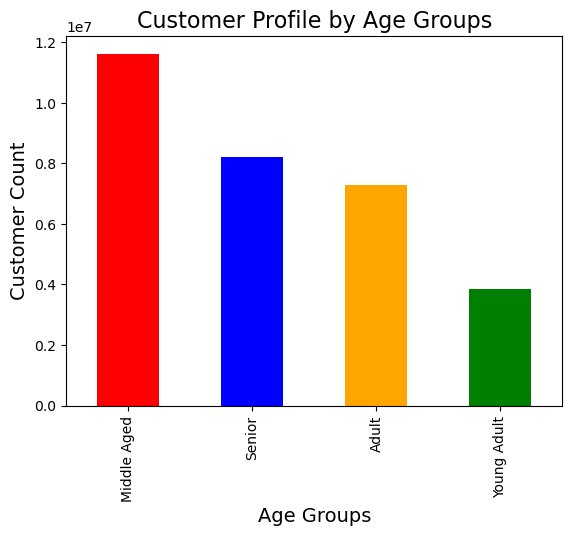

In [34]:
# Creating a Bar Chart
bar_age_group = df_2['age_group'].value_counts().plot.bar(color = ['red','blue','orange','green'])

# Setting the title and axis labels for clarity
plt.title('Customer Profile by Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)

In [35]:
# Exporting Image File
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_age_group.png'), bbox_inches='tight')

# Income

In [37]:
# Creating Income Profiling Variables
df_2.loc[df_2['income'] <= 50000 ,'income_group'] = 'Low'
df_2.loc[(df_2['income'] > 50000) & (df_2['income'] <= 100000) ,'income_group'] = 'Middle'
df_2.loc[df_2['income'] > 100000 ,'income_group'] = 'High'

C:\Users\User\AppData\Local\Temp\ipykernel_11840\3716484379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['income'] <= 50000 ,'income_group'] = 'Low'


In [38]:
# Examining the Value Counts Function on 'income_group'
df_2['income_group'].value_counts()

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

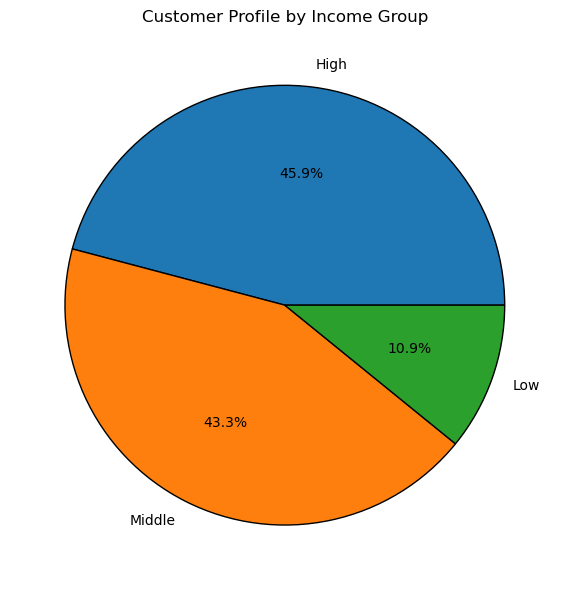

In [39]:
# Creating a Pie Chart
pie_income_group = df_2['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart = pie_income_group.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Customer Profile by Income Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [40]:
# Exporting Image File
income_group_pie_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.pie_chart_income_group.png'))

# Customers with Dependents

In [42]:
# Creating a dependents_flag
df_2.loc[df_2['number_of_dependents'] == 0, 'dependents_flag'] = 'No dependents'
df_2.loc[df_2['number_of_dependents'] >= 1, 'dependents_flag'] = 'Has dependents'

C:\Users\User\AppData\Local\Temp\ipykernel_11840\301567001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['number_of_dependents'] == 0, 'dependents_flag'] = 'No dependents'


In [43]:
# Examining the Value Counts Function on 'dependents_flag'
df_2['dependents_flag'].value_counts()

dependents_flag
Has dependents    23224883
No dependents      7739681
Name: count, dtype: int64

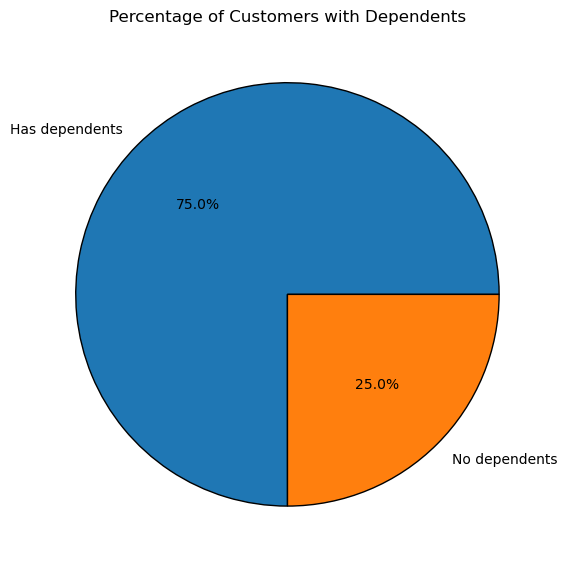

In [44]:
# Creating a Pie Chart
pie_dependents_flag = df_2['dependents_flag'].value_counts()
plt.figure(figsize=(6,6))
pie_chart_dependents_flag = pie_dependents_flag.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Percentage of Customers with Dependents')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [45]:
# Exporting Image File
pie_chart_dependents_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.pie_chart_dependents_flag.png'))

## Aggregate the Max, Mean, and Min Variables on a Customer-Profile Level for Usage Frequency and Expenditure

In [47]:
# Checking the Columns
df_2.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'family_status', 'income', 'region',
       'exclusion_flag', 'age_group', 'income_group', 'dependents_flag'],
      dtype='object')

In [48]:
# Aggregating Customer Profiles with the Total Cost per Order
customer_profile = df_2.groupby(['user_id', 'order_number', 'loyalty_flag', 'spending_flag', 'region', 'age_group', 'income_group', 
                                     'family_status', 'dependents_flag', 'days_since_prior_order'])['prices'].sum().reset_index()

In [49]:
# Display the Aggregated Customer Profile
customer_profile.head()

user_id  order_number  loyalty_flag spending_flag region age_group  \
0        1             2  New customer   Low spender  South     Adult   
1        1             3  New customer   Low spender  South     Adult   
2        1             4  New customer   Low spender  South     Adult   
3        1             5  New customer   Low spender  South     Adult   
4        1             6  New customer   Low spender  South     Adult   

  income_group family_status dependents_flag  days_since_prior_order  prices  
0          Low       married  Has dependents                    15.0    35.4  
1          Low       married  Has dependents                    21.0    28.2  
2          Low       married  Has dependents                    29.0    26.0  
3          Low       married  Has dependents                    28.0    57.0  
4          Low       married  Has dependents                    19.0    25.0

In [50]:
# Renaming 'prices' to 'order_total'
customer_profile.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [51]:
# Checking the Datatype
customer_profile['order_total'].dtype

dtype('float64')

# Age Group

In [53]:
# Aggregating the Mean, Min, and Max of 'days_since_prior_order' and 'order_total' for each 'age_group'
agg_age_group = customer_profile.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']})

# Income Group

In [55]:
# Aggregating the Mean, Min, and Max of 'days_since_prior_order' and 'order_total' for each 'income_group'
agg_income_group = customer_profile.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']}) 

# Dependents Flag

In [57]:
# Aggregating the Mean, Min, and Max of 'days_since_prior_order' and 'order_total' for each 'dependents_flag'
agg_dependents_flag = customer_profile.groupby('dependents_flag').agg({'days_since_prior_order':['mean','min','max'],'order_total':['mean','min','max']}) 

## Compare Your Customer Profiles with Regions and Departments

In [59]:
# Importing departments_wrangled.csv File
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [60]:
# Checking the Output
df_dept.head()

Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol

In [61]:
# Renaming Index Column as 'department_id'
df_dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [62]:
# Checking the Updated Output
df_dept.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [63]:
# Merging df_2 Dataset with Department Dataset
instacart_dept = df_2.merge(df_dept, on = 'department_id', how = 'left', indicator = True)

In [64]:
# Checking the Shape
instacart_dept.shape

(30964564, 38)

In [65]:
# Examining Value Counts on 'department' Column
instacart_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

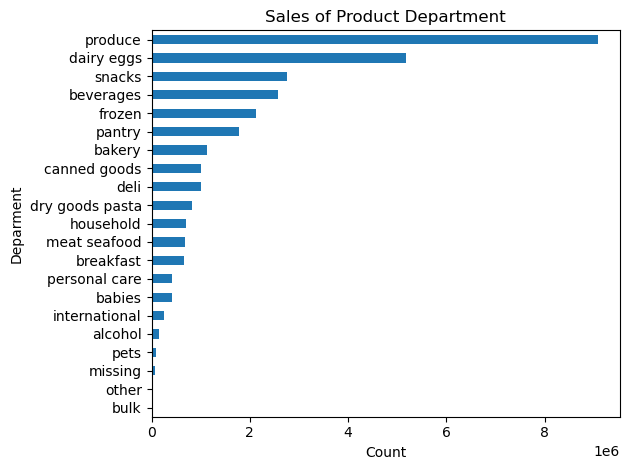

In [66]:
# Creating a Bar Chart for Departments
bar_dept = instacart_dept['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Sales of Product Department')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [67]:
# Exporting Image File
bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_product_departments.png'))

In [68]:
# Selecting Relevant Columns
df_user_sample = instacart_dept[['user_id', 'age_group', 'income_group', 'dependents_flag', 'region', 'loyalty_flag']]

In [69]:
# Checking Duplicates
df_user_sample = df_user_sample.drop_duplicates()

In [70]:
# Checking the Shape of Dataframe
df_user_sample.shape

(162631, 6)

# Customer Profile by Region

# Compare Age Group with Region

In [73]:
# Comparing 'age_group' with 'region'
age_region_comparison = pd.crosstab(instacart_dept['age_group'],instacart_dept['region'],dropna = False)

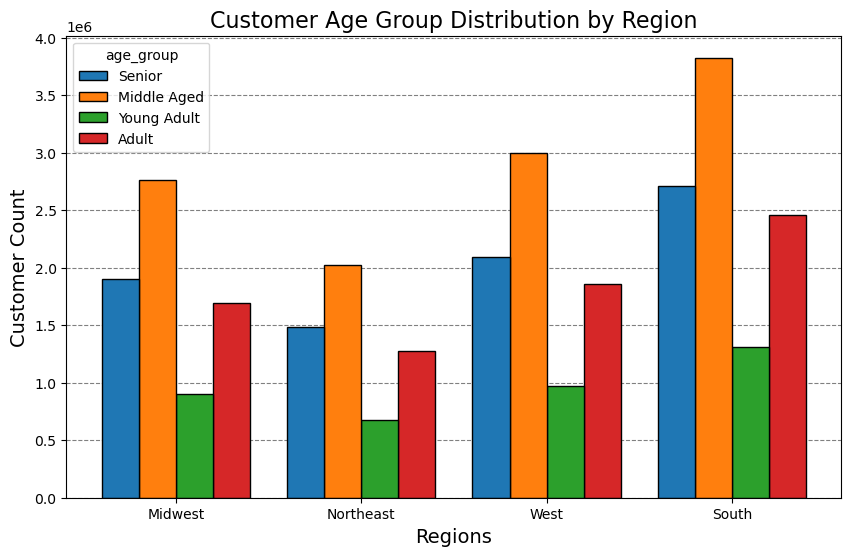

In [74]:
# Creating a Histogram to Compare Age Groups across Different Regions
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)  

# Adding a Grid to the Background for Better Readability
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='gray', linestyle='dashed')

# Setting Titles and Labels for the Plot
plt.title('Customer Age Group Distribution by Region', fontsize=16)
plt.ylabel('Customer Count', fontsize=14)
plt.xlabel('Regions', fontsize=14)

# Exporting Image File and Showing
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.hist_age_by_region.png'), bbox_inches = 'tight')
plt.show()

# Compare Income Group with Region

In [76]:
# Comparing 'income_group' with 'region'
income_region_comparison = pd.crosstab(instacart_dept['income_group'],instacart_dept['region'],dropna = False)

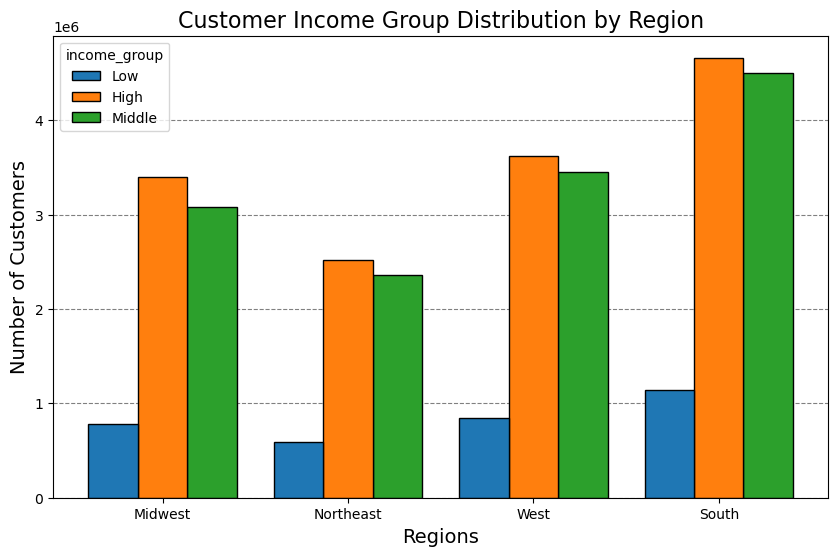

In [77]:
# Creating a Histogram to Compare Income Groups across Different Regions
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)

# Adding a Grid in the Background for Better Visualization
plt.gca().set_axisbelow(True)  # Ensure the grid is positioned behind the bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# Setting the Title and Axis Labels
plt.title('Customer Income Group Distribution by Region', fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xlabel('Regions', fontsize=14)

# Exporting the Image File and Displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.hist_income_by_region.png'), bbox_inches='tight')
plt.show()

# Compare Departments with Regions

In [79]:
# Comparing 'department' with 'region'
dept_region_comparison = pd.crosstab(instacart_dept['department'], instacart_dept['region'], dropna = False)

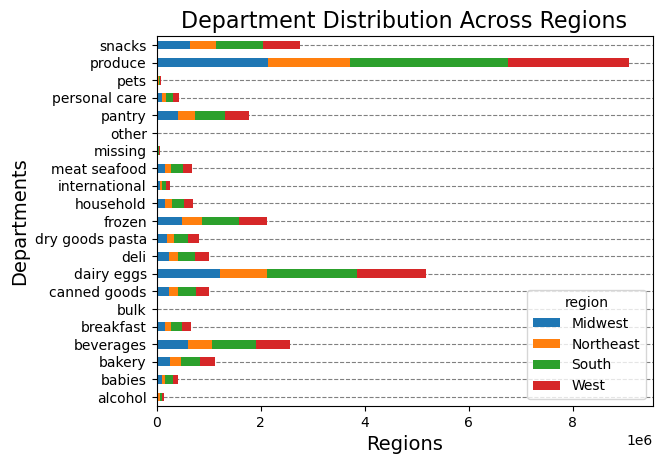

In [80]:
# Horizontal Bar Chart for Department Comparison by Region
bar_dept_reg = dept_region_comparison.plot.barh(stacked=True)

# Adding a Grid in the Background for Better Visualization
plt.gca().set_axisbelow(True)  
plt.grid(axis='y', color='gray', linestyle='dashed')

# Setting the Title and Axis Labels
plt.title('Department Distribution Across Regions', fontsize=16)
plt.ylabel('Departments', fontsize=14)
plt.xlabel('Regions', fontsize=14)

# Exporting Image File
bar_dept_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_department_region.png'), bbox_inches='tight')

# Compare Dependents with Regions

In [82]:
# Comparing 'dependents_flag' with 'region'
dependent_region_comparison  = pd.crosstab(instacart_dept['dependents_flag'],instacart_dept['region'],dropna = False)

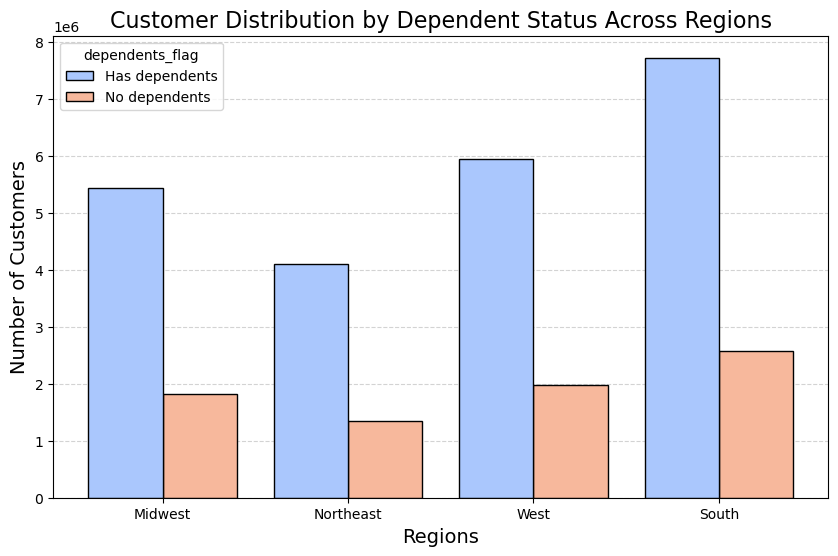

In [83]:
# Creating a Histogram for Customers based on their Dependent Status by Region
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='dependents_flag', multiple='dodge', 
             shrink=.8, alpha=1, palette='coolwarm')  # Use a different color palette

# Overlaying a Grid behind the Bars for Improved Readability
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the Title and Axis Labels for Clarity
plt.title('Customer Distribution by Dependent Status Across Regions', fontsize=16)
plt.ylabel('Number of Customers', fontsize=14)
plt.xlabel('Regions', fontsize=14)

# Exporting the Image File and Displaying it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.hist_dependents_by_region.png'), bbox_inches='tight')
plt.show()

# Compare Family Status with Region

In [85]:
# Comparing 'family_stastus' with 'region'
fam_status_region_comparion = pd.crosstab(instacart_dept['family_status'],instacart_dept['region'],dropna = False)

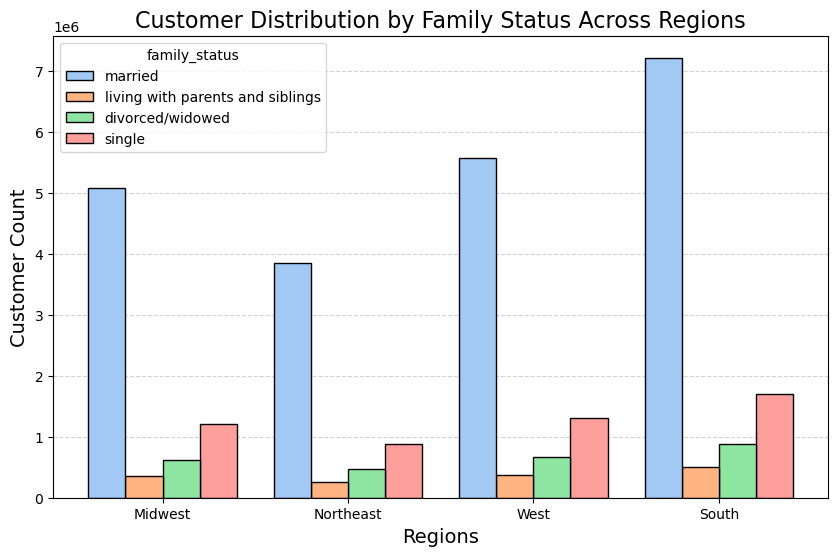

In [86]:
# Creating a Histogram for Customers based on Family Status across Regions
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='family_status', multiple='dodge', 
             shrink=.8, alpha=1, palette='pastel')  # Use a softer color palette

# Overlaying a Grid behind the Bars for Enhanced Visibility
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the Title and Axis Labels for better Understanding
plt.title('Customer Distribution by Family Status Across Regions', fontsize=16)
plt.ylabel('Customer Count', fontsize=14)
plt.xlabel('Regions', fontsize=14)

# Save the figure and display it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.hist_fam_status_region.png'), bbox_inches='tight')
plt.show()

# Customer Profile by Departments

# Compare Age Group by Departments

In [89]:
# Comparing 'age_group' with 'department'
age_dept_comparison = pd.crosstab(instacart_dept['department'],instacart_dept['age_group'],dropna = False)

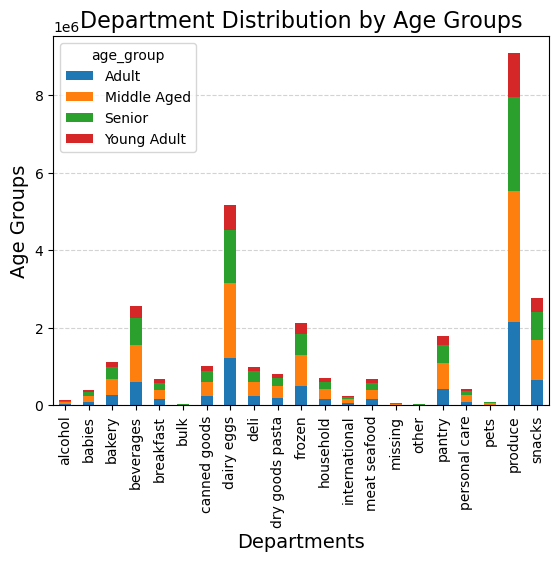

In [90]:
# Creating a Bar Chart for Age Group Distribution by Department
bar_age_dept = age_dept_comparison.plot.bar(stacked=True)

# Adding a grid in the background for better visualization
plt.gca().set_axisbelow(True)  
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Department Distribution by Age Groups', fontsize=16)
plt.xlabel('Departments', fontsize=14)
plt.ylabel('Age Groups', fontsize=14)

# Exporting image file
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_age_group_department.png'), bbox_inches='tight')

# Compare Income Group by Departments

In [92]:
# Comparing 'income_group' by 'department'
income_dept_comparison = pd.crosstab(instacart_dept['department'],instacart_dept['income_group'],dropna = False)

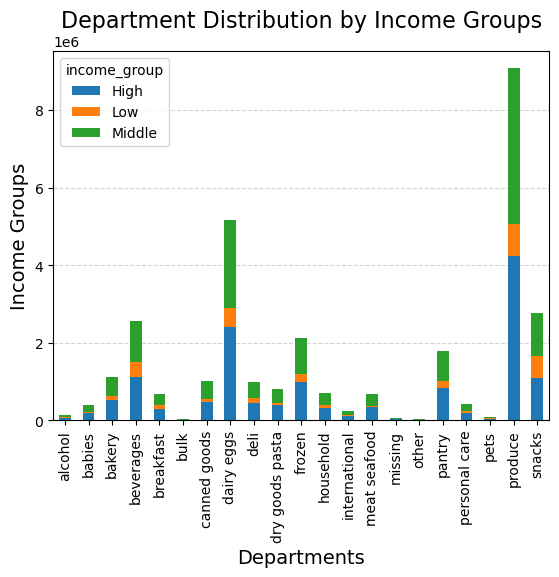

In [93]:
# Creating a Bar Chart for Income Group Distribution by Department
bar_income_dept = income_dept_comparison.plot.bar(stacked=True)

# Adding a grid behind the bars for enhanced visibility
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Department Distribution by Income Groups', fontsize=16)
plt.xlabel('Departments', fontsize=14)
plt.ylabel('Income Groups', fontsize=14)

# Saving the bar chart as an image file
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_income_group_department.png'), bbox_inches = 'tight')

# Compare Dependents by Departments

In [95]:
# Comparing 'dependents_flag' by 'departments'
dependent_dept_comparison = pd.crosstab(instacart_dept['department'], instacart_dept['dependents_flag'], dropna = False)

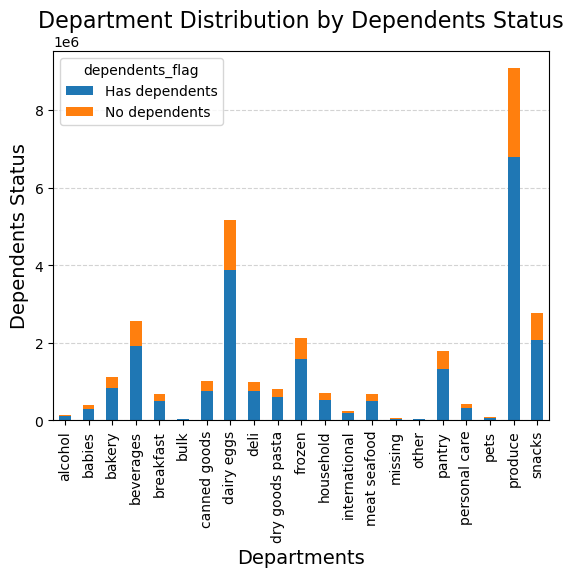

In [96]:
# Creating a Bar Chart for Dependents Flag Distribution by Department
bar_dependent_dept = dependent_dept_comparison.plot.bar(stacked=True)

# Adding a grid behind the bars for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Department Distribution by Dependents Status', fontsize=16)
plt.xlabel('Departments', fontsize=14)
plt.ylabel('Dependents Status', fontsize=14)

# Exporting bar chart
bar_dependent_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_dependent_department.png'), bbox_inches='tight')

# Compare Regions with Departments

In [98]:
# crosstabing 'region' with 'department'
region_dept_crosstab = pd.crosstab(instacart_dept['region'], instacart_dept['department'], dropna = False)

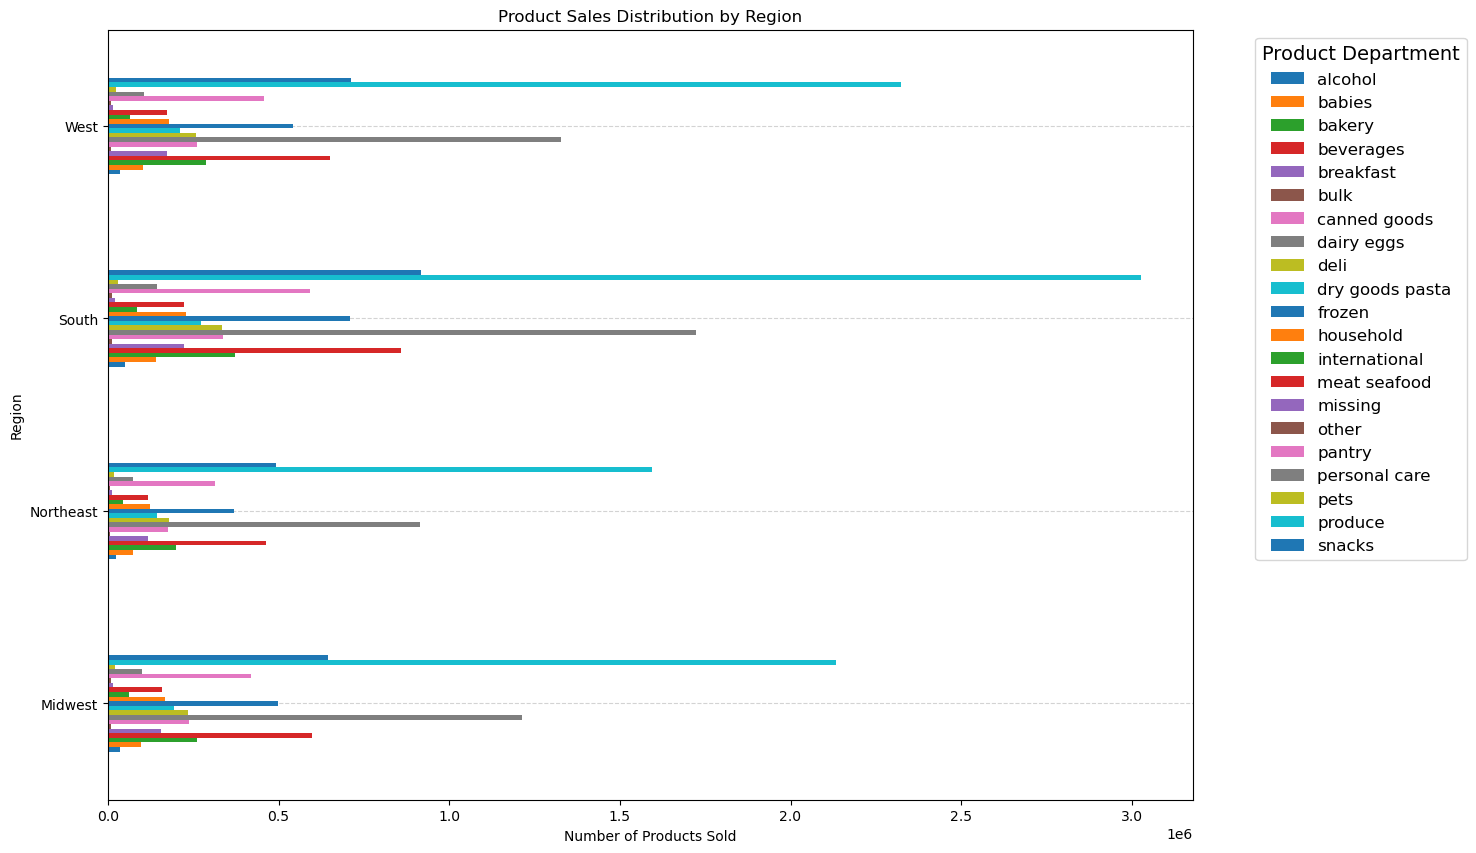

In [99]:
# Creating a Bar Chart
bar_region_dept = region_dept_crosstab.plot(kind='barh', figsize=(14, 10))

# Adding a grid behind the bars for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Product Sales Distribution by Region')
plt.xlabel('Number of Products Sold')
plt.ylabel('Region')

# Move legend outside of plot with adjusted title and font size
plt.legend(title='Product Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Exporting Image File
bar_region_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10.bar_region_depts.png'), bbox_inches = 'tight')

# Other Visualizations

# Orders by Day of Week

In [102]:
# Importing orders_products_merged_grouped.pkl File
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'ords_prods_cust_combine.pkl'))

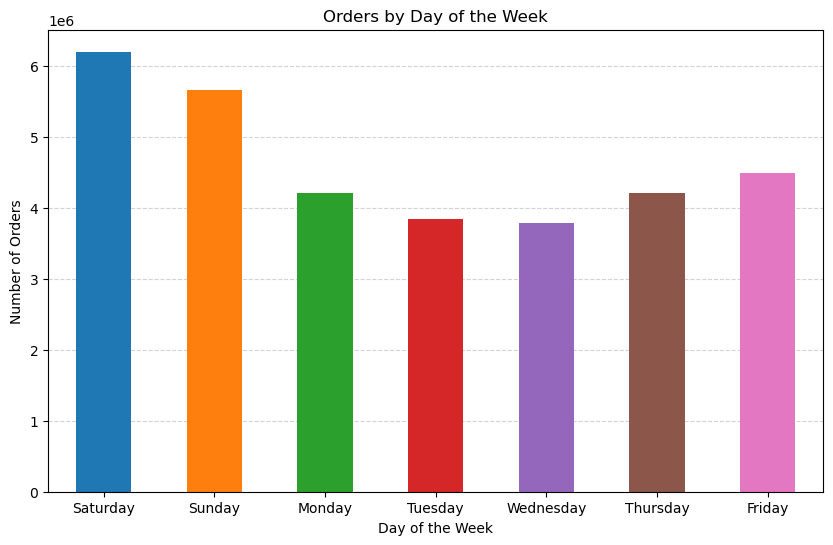

In [103]:
# Creating a Bar Chart for Orders by Day of Week
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']  # Custom colors for each day
bar_orders_dow = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot(kind='bar', color = colors, figsize=(10, 6))

# Adding a grid behind the bars for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Adjusting the x-tick labels for day names
plt.xticks(ticks=range(7), labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)

# Exporting the image file
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_orders_by_day_of_week.png'), bbox_inches='tight')

# Orders by Hour of Day

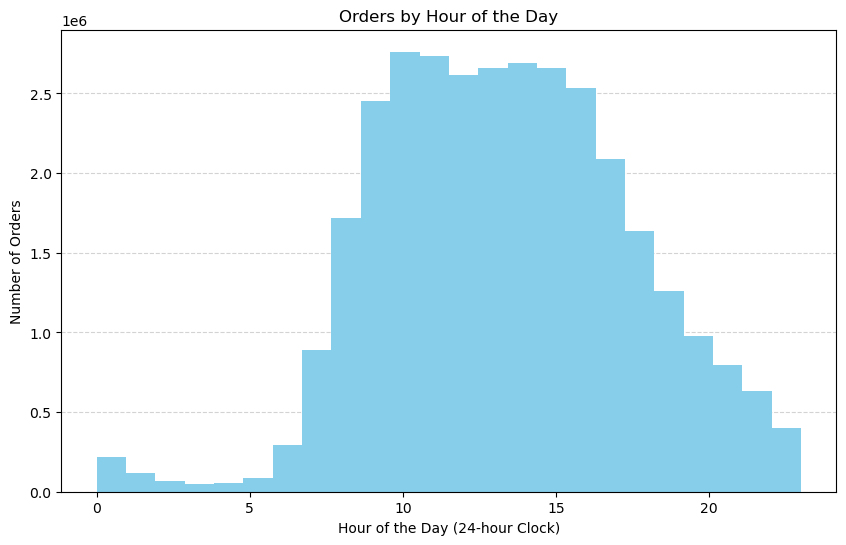

In [105]:
# Creating a Histogram of Orders by Hour of Day
hist_hod = df_ords_prods_merge['order_hour_of_day'].plot(kind='hist', bins=24, figsize=(10, 6), color='skyblue')

# Adding a grid behind the histogram for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour Clock)')
plt.ylabel('Number of Orders')

# Exporting the image file
hist_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.hist_orders_by_hour_of_day.png'), bbox_inches='tight')

# Compare Loyalty Flag with Income Group

In [107]:
# Crosstabing loyalty with Income Group
loyalty_income_crosstab = pd.crosstab(instacart_dept['loyalty_flag'], instacart_dept['income_group'], dropna = False)

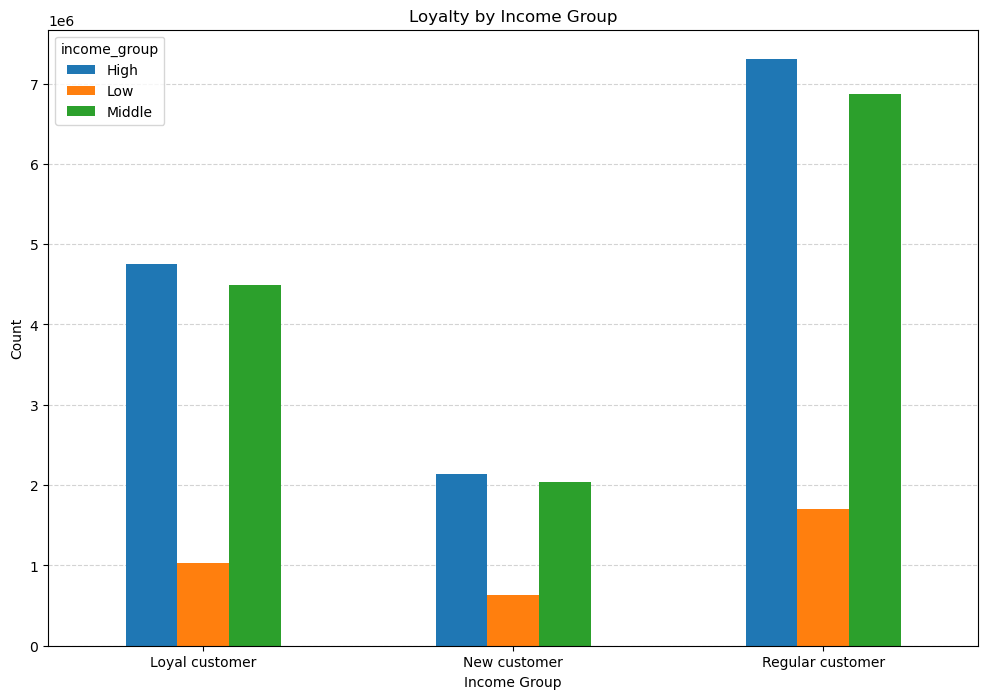

In [108]:
# Creating a Bar Chart for Loyalty by Income Group
bar_loyalty_income = loyalty_income_crosstab.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding a grid behind the bars for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Loyalty by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Adjusting the x-tick labels to stay horizontal
plt.xticks(rotation=0)

# Exporting the image file
bar_loyalty_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_loyalty_by_income_group.png'), bbox_inches='tight')

# Compare Loyalty with Spending

In [110]:
# Crosstabing loyalty with spending
loyalty_spender_crosstab = pd.crosstab(instacart_dept['loyalty_flag'], instacart_dept['spending_flag'], dropna = False)

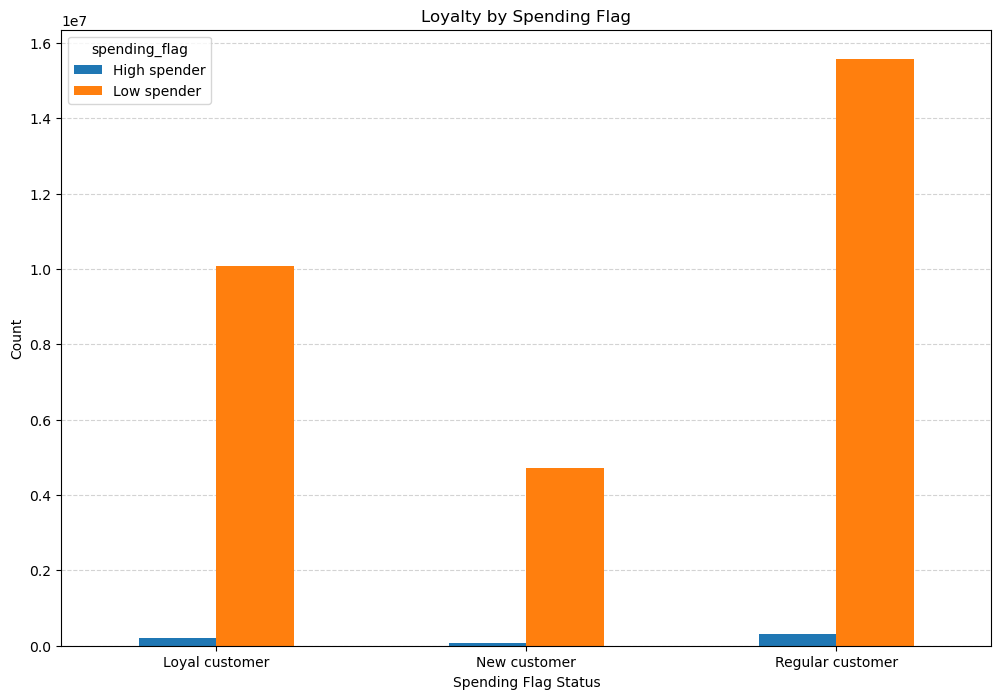

In [111]:
# Creating a Bar Chart for Loyalty by Spender Flag
bar_loyalty_spender = loyalty_spender_crosstab.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])

# Adding a grid behind the bars for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Loyalty by Spending Flag')
plt.xlabel('Spending Flag Status')
plt.ylabel('Count')

# Adjusting the x-tick labels to stay horizontal
plt.xticks(rotation=0)

# Exporting the image file
bar_loyalty_spender.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_loyalty_by_spending_flag.png'), bbox_inches='tight')

# Compare Loyalty with Family Status

In [113]:
# Crosstabing loyalty with family status
loyalty_fam_crosstab = pd.crosstab(instacart_dept['loyalty_flag'], instacart_dept['family_status'], dropna = False)

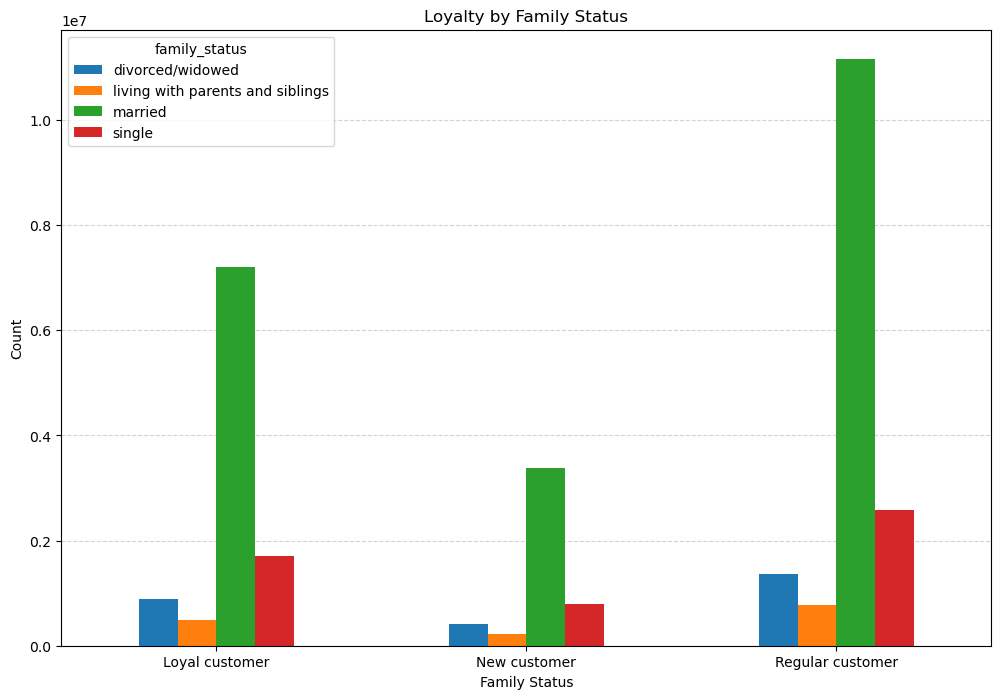

In [114]:
# Creating a Bar Chart for Loyalty by Family Status
bar_loyalty_family = loyalty_fam_crosstab.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adding a grid behind the bars for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Loyalty by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')

# Adjusting the x-tick labels to stay horizontal
plt.xticks(rotation=0)

# Exporting the image file
bar_loyalty_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_loyalty_by_family_status.png'), bbox_inches='tight')

# Compare Loyalty with Dependents

In [195]:
# Crosstabing loyalty with Dependants
loyalty_depend_crosstab = pd.crosstab(instacart_dept['loyalty_flag'], instacart_dept['dependents_flag'], dropna = False)

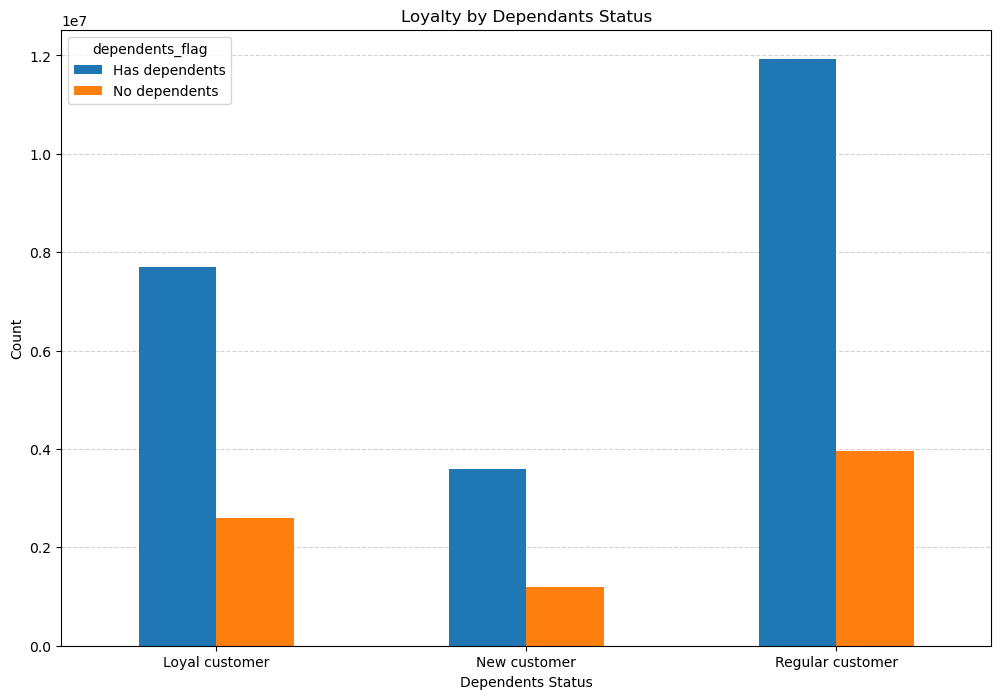

In [197]:
# Creating a Bar Chart for Loyalty by Dependents Status
bar_loyalty_depend = loyalty_depend_crosstab.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])

# Adding a grid behind the bars for better visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting the title and axis labels for clarity
plt.title('Loyalty by Dependants Status')
plt.xlabel('Dependents Status')
plt.ylabel('Count')

# Adjusting the x-tick labels to stay horizontal
plt.xticks(rotation=0)

# Exporting the image file
bar_loyalty_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.bar_loyalty_by_dependents_status.png'), bbox_inches='tight')

# Check Distribution of Family Status

In [199]:
# Examining Value Counts on 'family_status'
fam_status = instacart_dept['family_status'].value_counts(dropna = False)

In [201]:
fam_status

family_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

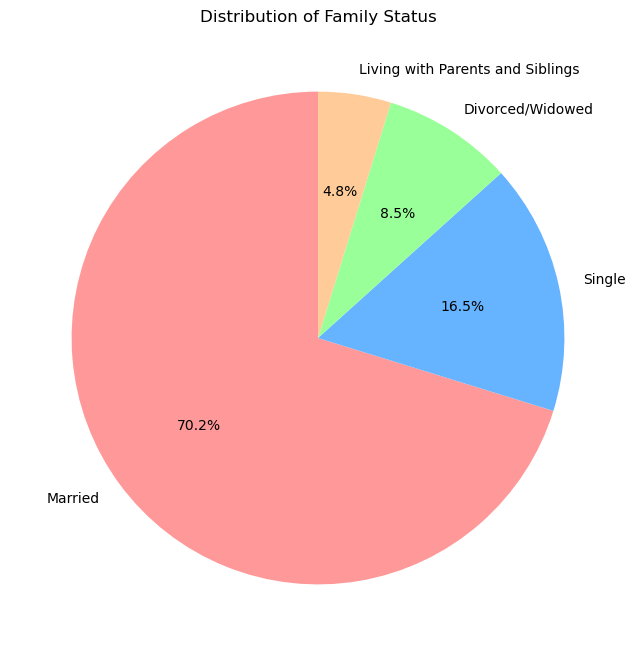

In [203]:
# Creating a Pie Chart for Distribution of Family Status
pie_fam_status_distribution = fam_status.plot.pie(
    autopct='%1.1f%%',
    labels=['Married', 'Single', 'Divorced/Widowed', 'Living with Parents and Siblings'],
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
    figsize=(8, 8)
)

# Setting the title for clarity
plt.title('Distribution of Family Status')

# Hide the y-axis label for a cleaner look
plt.ylabel('')

# Displaying the pie chart
plt.show()

# Exporting Image File
pie_fam_status_distribution.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.pie_distribution_family_status.png'), bbox_inches='tight')

# Produce suitable charts to illustrate your results and export them in your project folder

Done